## Fraud Detection in Bank Transactions

Name: Sumit Kumar Sangroula, Student ID: GH1040901

### 1.  Context

The dataset contains transaction details of numerous customers of LOL Bank Pvt.Ltd. for the year 2025. Although the transactions seem ligit in financial terms, there are numerous transactions over the time which might be the cases of fraudulent acts. Our task is to detect the fraudulent transactions and minimize the effects on customers as well as the bank itself by deploying the best machine learning model. 

### 2. Objective

1. To study the data with various exploration methods, transform them if necessary.
2. To perform feature engineering and choose the best model for identifying the suspicious transactions from the customers' accounts.
3. To secure the financial thefts of the customers in the future by deploying a robust fraud detection model.
4. To build a secure transaction gateway by applying different security tools.
5. Manually, analyzing a huge dataset for illegimate transactions is tiresome and requires huge no. of manpower and time, thus building and deploying a secured platform would eventually help reduce bank frauds.

### 3. Data Source

We sourced the data from https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection/data
* Name of the dataset: Bank Transaction Fraud Detection
* Format: CSV
* No. of Columns: 24
* No. of Records: 200000

### 4. Importing necessary libraries

In [1]:
import pandas as pad
import numpy as nmp
import matplotlib.pyplot as pyp
import seaborn as seb
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection  import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score

Importing the dataset from the local drive.The dataset was first downloaded from the source to a local drive.

In [2]:
data_src = "C:/Users/Acer/Desktop/mldataset/Bank_Transaction_Fraud_Detection.csv"
dtf1 = pad.read_csv(data_src)

### 5. Data Exploration

Exploring the data thoroughly and modify it if necessary.

In [3]:
dtf1.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [4]:
dtf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [5]:
dtf1.shape

(200000, 24)

### 6. Data Cleaning

In [6]:
dtf1 = dtf1.drop(['Customer_ID','Customer_Name', 'Merchant_ID', 'Transaction_Time', 'Transaction_ID', 'Transaction_Currency', 'Customer_Email', 'Customer_Contact', 'Transaction_Description'], axis=1 )
dtf1.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,23-01-2025,32415.45,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,11-01-2025,43622.60,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,25-01-2025,63062.56,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,19-01-2025,14000.72,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,30-01-2025,18335.16,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0


Checking the presence of Null and Duplicate Values

In [7]:
dtf1.duplicated().sum()

0

In [8]:
#Checking and showing the total null values in each column. 
dtf1.isnull().sum() 

Gender                  0
Age                     0
State                   0
City                    0
Bank_Branch             0
Account_Type            0
Transaction_Date        0
Transaction_Amount      0
Transaction_Type        0
Merchant_Category       0
Account_Balance         0
Transaction_Device      0
Transaction_Location    0
Device_Type             0
Is_Fraud                0
dtype: int64

There is no presence of null values in our dataset.

### 7. Exploratory Data Analysis

Checking total no. of fraud cases.

In [9]:
dtf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                200000 non-null  object 
 1   Age                   200000 non-null  int64  
 2   State                 200000 non-null  object 
 3   City                  200000 non-null  object 
 4   Bank_Branch           200000 non-null  object 
 5   Account_Type          200000 non-null  object 
 6   Transaction_Date      200000 non-null  object 
 7   Transaction_Amount    200000 non-null  float64
 8   Transaction_Type      200000 non-null  object 
 9   Merchant_Category     200000 non-null  object 
 10  Account_Balance       200000 non-null  float64
 11  Transaction_Device    200000 non-null  object 
 12  Transaction_Location  200000 non-null  object 
 13  Device_Type           200000 non-null  object 
 14  Is_Fraud              200000 non-null  int64  
dtype

In [10]:
dtf1['Is_Fraud'].value_counts()

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64

Calculation of total amount of fraud transactions.

In [11]:
dtf1[dtf1['Is_Fraud'] == 1]['Transaction_Amount'].sum()

497115709.84

Fraud detection according to Account_Type.

In [12]:
dtf1[dtf1['Is_Fraud'] == 1].groupby(['Account_Type'])['Is_Fraud'].count().sort_values(ascending=False) #Fraud detection according to Account_Type.

Account_Type
Business    3436
Savings     3349
Checking    3303
Name: Is_Fraud, dtype: int64

Fraud detection according to Merchant_Category.

In [13]:
dtf1[dtf1['Is_Fraud'] == 1].groupby(['Merchant_Category'])['Is_Fraud'].count().sort_values(ascending=False) #Finding the category where fraud transactions occur more.

Merchant_Category
Clothing         1734
Groceries        1722
Restaurant       1688
Electronics      1681
Health           1651
Entertainment    1612
Name: Is_Fraud, dtype: int64

Checking which month has the maximum fraud cases.

In [14]:
dtf1[dtf1['Is_Fraud'] == 1].groupby('Transaction_Date')['Is_Fraud'].count().head(5) #Showing the top 5 months with max fraud cases.

Transaction_Date
01-01-2025    355
02-01-2025    347
03-01-2025    339
04-01-2025    307
05-01-2025    344
Name: Is_Fraud, dtype: int64

Most of the frauds were detected during the first month of 2025.

Finding out which devices were mostly used for fraud transactions.

In [15]:
dtf1[dtf1['Is_Fraud'] == 1].groupby(['Device_Type'])['Is_Fraud'].count().sort_values(ascending=False)

Device_Type
Desktop    2544
POS        2533
ATM        2518
Mobile     2493
Name: Is_Fraud, dtype: int64

### 8. Feature Engineering

In [16]:
cat_fts = dtf1.select_dtypes(include = 'object' )
print(cat_fts.columns)

Index(['Gender', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Type', 'Merchant_Category',
       'Transaction_Device', 'Transaction_Location', 'Device_Type'],
      dtype='object')


In [17]:
#Encoding and transforming categorical attributes (It changes categorical attributes to numerical attributes)
lbe = LabelEncoder()
for col in cat_fts :
    dtf1[col] = lbe.fit_transform(dtf1[col]) #Fitting the selected catagorical values.

In [18]:
num_fts = dtf1.select_dtypes(exclude = 'object' )
print(num_fts.columns)

Index(['Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
       'Transaction_Date', 'Transaction_Amount', 'Transaction_Type',
       'Merchant_Category', 'Account_Balance', 'Transaction_Device',
       'Transaction_Location', 'Device_Type', 'Is_Fraud'],
      dtype='object')


In [19]:
#Scaling and fitting numerical attributes   
slr = StandardScaler() #Assigning standarscaler method to a varible
num_fts = ['Age','Transaction_Amount','Account_Balance'] #Selecting columns with numerical values. We won't include Is_Fraud since we are detecting whether the transaction is fraud or not.
dtf1[num_fts] = slr.fit_transform(dtf1[num_fts]) #Fitting numerical values using Standard Scaler.

Checking attributes after encoding and scaling categorical and numerical attributes respectively.

In [20]:
dtf1.head()

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Amount,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud
0,1,1.045534,15,127,127,2,22,-0.599702,3,5,0.807290,17,129,3,0
1,0,0.456865,18,100,100,0,10,-0.207182,0,5,0.809676,9,102,1,0
2,1,-1.570771,4,13,13,2,24,0.473684,0,3,0.524828,0,13,1,0
3,0,0.849311,28,22,22,0,18,-1.244660,2,2,0.209460,8,24,2,0
4,0,-0.066396,25,7,7,2,29,-1.092851,3,2,-1.325919,16,7,2,0


In [21]:
dtf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                200000 non-null  int32  
 1   Age                   200000 non-null  float64
 2   State                 200000 non-null  int32  
 3   City                  200000 non-null  int32  
 4   Bank_Branch           200000 non-null  int32  
 5   Account_Type          200000 non-null  int32  
 6   Transaction_Date      200000 non-null  int32  
 7   Transaction_Amount    200000 non-null  float64
 8   Transaction_Type      200000 non-null  int32  
 9   Merchant_Category     200000 non-null  int32  
 10  Account_Balance       200000 non-null  float64
 11  Transaction_Device    200000 non-null  int32  
 12  Transaction_Location  200000 non-null  int32  
 13  Device_Type           200000 non-null  int32  
 14  Is_Fraud              200000 non-null  int64  
dtype

Splitting data into training and testing data sets.

In [22]:
Xt = dtf1.drop(['Transaction_Date','Is_Fraud'],axis =1)
yt= dtf1['Is_Fraud']  

In [23]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.2, random_state = 42) #We are assigning 80% of the data for training and 20% for testing; and chosing a default value of 42 for random_state.

### Scaling

In [24]:
sclr = StandardScaler()

In [25]:
#Scaling the train and test data.
Xt_train_scld = sclr.fit_transform(Xt_train)
Xt_test_scld = sclr.transform(Xt_test)

### 9. Model Training

Since we have a target label 'Is_Fraud', we will use the models of Supervised Learning.

In [26]:
#Choosing models for training the data
mods = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
}
#Training and evaluating the models.
opt = {}
for m_name, mod in mods.items():
    mod.fit(Xt_train_scld, yt_train)
    y_pred = mod.predict(Xt_test_scld) 
    y_prob = mod.predict_proba(Xt_test_scld)[:, 1]
    
    print(f'Output of {m_name}:')
    print(classification_report(yt_test, y_pred))
    print('\n')

Output of Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



Output of Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     37955
           1       0.05      0.07      0.06      2045

    accuracy                           0.89     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.90      0.89      0.90     40000



Output of Random Forest:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           1       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49

It seems that most of the transactions were detected as ligit or True Positive neglecting the actual fraud cases. So, to avoid this, we should evaluate the model on the bases of recall values generated by all the models. If we look the recall values(0- ligit, 1- fraud) for every models, all of the models choosen has no significance effect in predicting fraudulent cases. So, we need to re-sample the data and assign some hyperparameters to choose the best model for fraud detection.

#### Sampling and Tuning the hyper-parameters

In [27]:
#Re-sampling the train dataset using SMOTE
smote = SMOTE(random_state=42)
Xt_train_res, yt_train_res = smote.fit_resample(Xt_train, yt_train)

#Scaling the train and test data
sclr = StandardScaler()
Xt_train_scld = sclr.fit_transform(Xt_train_res)
Xt_test_scld = sclr.transform(Xt_test)

#### Model Selection

In [28]:
#Choosing the models
mods1 = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', warm_start=True),
    'Gradient Boosting': GradientBoostingClassifier(warm_start=True),
    'XGBoost': xgb.XGBClassifier(scale_pos_weight='balanced')
}

Tuning the parameters

In [29]:
#Adding hyperparameters to each model
prm_grids = {
    'Logistic Regression': {
        'model__C': [0.1, 1, 10, 100],
        'model__penalty': ['l2'],
        'model__solver': ['liblinear']
    },
    'Decision Tree': {
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2],
        'model__class_weight': ['balanced', None]
    },
    'Random Forest': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2],
        'model__class_weight': ['balanced', None]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5],
        'model__scale_pos_weight': [1, 2, 3]
    }
}

### 10. Model Deployment

In [30]:
#Assigning a variable to store the recall values for each threshold of the model which will be later used for comparision.
recall_vals = {model_name: [] for model_name in mods1.keys()}

#Defining a function to apply threshold
def app_threshold(y_prob, threshold):
    return (y_prob >= threshold).astype(int)

#Assining threshold values
tsholds = [0.3, 0.5, 0.7]

#Fitting the model with thresholds
for md_name, mod in mods1.items():
    print(f"\nTraining and evaluating {md_name}")
    
    #Assigning a pipeline for every model with scaling
    ppl = Pipeline([('scaler', StandardScaler()), ('model', mod)])
    
    #Since we will evaluate the models on the basis of 'recall' values, we assign recall to scoring.
    gd_search = GridSearchCV(estimator=ppl, param_grid=prm_grids[md_name], cv=StratifiedKFold(n_splits=3), scoring='recall', n_jobs=-1, verbose=1)
    
    #Using GridSearchCV to train the model as it performs intense search for all the possible combination without missing combinations.
    gd_search.fit(Xt_train_scld, yt_train_res)
    
    #Finding and printing the most significant hyperparameters.
    sgt_pms = gd_search.best_params_
    print(f"The most significant parameters for {md_name}: {sgt_pms}")
    
    #Predicting and printing metrics.
    y_prob = gd_search.predict_proba(Xt_test_scld)[:, 1]  # Probabilities for the positive class
    aucc_score = roc_auc_score(yt_test, y_prob)
    print(f"ROC AUC for {md_name}: {aucc_score}")
    
    #Computing recall for different thresholds for every models.
    rcl_thresholds = [] #Stores recall values for different thresholds in a list.
    for trshd in tsholds:
        y_pd_threshold = app_threshold(y_prob, trshd)
        recall_at_trshd = recall_score(yt_test, y_pd_threshold)
        rcl_thresholds.append(recall_at_trshd)
        print(f"\nClassification Report for {md_name} at threshold {trshd}:")
        print(classification_report(yt_test, y_pd_threshold))
    
    #Storing recall values of the models.
    recall_vals[md_name] = rcl_thresholds


Training and evaluating Logistic Regression
Fitting 3 folds for each of 4 candidates, totalling 12 fits
The most significant parameters for Logistic Regression: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
ROC AUC for Logistic Regression: 0.49703166051420433

Classification Report for Logistic Regression at threshold 0.3:
              precision    recall  f1-score   support

           0       0.95      0.23      0.37     37955
           1       0.05      0.77      0.10      2045

    accuracy                           0.26     40000
   macro avg       0.50      0.50      0.23     40000
weighted avg       0.90      0.26      0.36     40000


Classification Report for Logistic Regression at threshold 0.5:
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     37955
           1       0.05      0.36      0.09      2045

    accuracy                           0.62     40000
   macro avg       0.50      0.50     

### 11. Model Evaluation

All of the models performed well after tuning the hyperparameters given that they have higher recall values now compared to earlier outputs before hypertuning. The models could perform even better if we train models with optimum parameters on devices with robust computational capabilities.

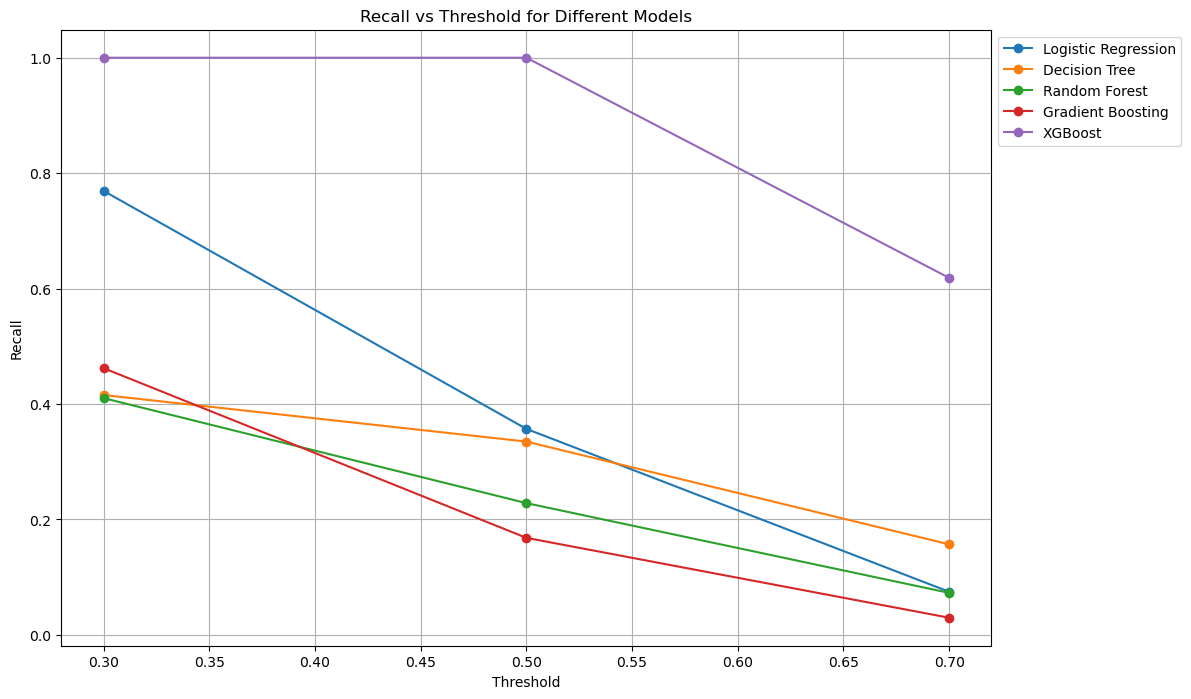

In [32]:
#Plotting Recall Vs Thresholds for all models at different thresholds.
pyp.figure(figsize=(12, 8))

for mod_name, rcl_thresholds in recall_vals.items():
    pyp.plot(tsholds, rcl_thresholds, label=mod_name, marker='o')

#Naming the features for the plot.
pyp.title('Recall vs Threshold for Different Models')
pyp.xlabel('Threshold')
pyp.ylabel('Recall')
pyp.legend(loc='upper left', bbox_to_anchor=(1, 1))
pyp.grid(True)
pyp.show()


From the line plot above, we can see that the recall values for 'Is_Fraud' is high at lower thresholds and keeps on decreasing as we increase the thresholds. From the plot, it is clear that if tuned properly,  XGBoost is the best model amongs all models to detect frauds from an imbalance dataset.

### 12. Conclusion

It is seen that all of our models without scaling and hypertuning performed well in terms of detecting non-fraudulent transactions with precision value of 0.95 for all models. However, there is no significance in the recall values for fraudulent transactions. It is obvious that they assumed some fraud cases to be ligit. To avaoid our models assuming frauds as ligit, we re-scaled the training data set and added some hyperparameters to every models with thresholds. After training the models once again with these features, our models performed better for the given dataset which can be clearly seen in the line plot above.
During the training of the models with hyperparameters, we experienced that if we keep assigning hyperparameters, the model training lags and require more computational power. Also, if we keep adding thresholds, we will get the best recall value for each model thus detecting frauds and keeping the precision high for ligit transactions. We must be aware during assigning thresholds and hyper tuning because assigning too much thresholds and over-hyper tuning could lead all our ligit transactions to be assumed fraud. Lastly, for the imbalance dataset we have, XGBoost model stood best. The same model could not fit well for other dataset as the evaluation is based on recall values which are dependent on thresholds, scaling and hyper-parameters.